# Install Dependencies

## External Dependencies

In [8]:
!pip install pandas

## FrostAura Dependencies

In [9]:
import os
import sys

USE_LOCAL_CODE: bool = True # NOTE: When changing this configuration, be sure to restart the interpreter in order to have sys path updates reflect.
directories_to_move_up: int = 2
current_executing_path: str = os.getcwd()
current_executing_path = current_executing_path.replace('\\', '/')
root_path: str = '/'.join(current_executing_path.split('/')[:-directories_to_move_up])

# Clean up.
%pip uninstall frostaura -y
sys.path = [p for p in sys.path if p != root_path]

if USE_LOCAL_CODE:
    sys.path.append(root_path)
else:
    %pip install -U --no-cache-dir frostaura

Note: you may need to restart the kernel to use updated packages.


## Logging

In [10]:
import logging

logging.basicConfig(level=logging.DEBUG)

# Import Dependencies

In [11]:

from frostaura.engines import IAssetCalculationsEngine
from frostaura.engines import SimpleAssetCalculationsEngine
from frostaura.data_access import IResourcesDataAccess
from frostaura.data_access import EmbeddedResourcesDataAccess
from frostaura.data_access import IPersonalAssetDataAccess
from frostaura.data_access import EasyEquitiesPersonalAssetDataAccess
from frostaura.data_access import IPublicAssetDataAccess
from frostaura.data_access import YahooFinanceDataAccess
import pandas as pd

# Usage

In [12]:
public_asset_data_access: IPublicAssetDataAccess = YahooFinanceDataAccess()
instance: IAssetCalculationsEngine = SimpleAssetCalculationsEngine(public_asset_data_access=public_asset_data_access)
resource_data_access: IResourcesDataAccess = EmbeddedResourcesDataAccess()
personal_asset_data_access: IPersonalAssetDataAccess = EasyEquitiesPersonalAssetDataAccess(resource_data_access=resource_data_access,
                                                                         username=None,
                                                                         password=None)
holdings: pd.DataFrame = personal_asset_data_access.get_personal_transactions()

In [13]:
holdings.sort_index(ascending=True)

,name,symbol,shares
date,,,
2022-07-01,Apple Inc.,AAPL,0.4317
2022-07-28,Tesla Inc.,TSLA,0.0688
2022-08-05,3D Systems Corporation,DDD,8.8925
2022-08-05,Sibanye Stillwater Ltd,SBSW,1.1265


In [14]:
holdings_profits: pd.DataFrame = instance.interpolate_holdings_profits(holdings=holdings)

holdings_profits

DEBUG:root:Calculating profit for asset "TSLA".
INFO:root:Fetching historical price movements for symbol "TSLA".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/TSLA?period1=-631159200&period2=1660503009&interval=1d&includePrePost=False&events=div%2Csplits HTTP/1.1" 200 None
DEBUG:root:[TSLA] Processing transaction value $0.0688 on 2022-07-28 00:00:00.
DEBUG:root:Calculating profit for asset "AAPL".
INFO:root:Fetching historical price movements for symbol "AAPL".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/AAPL?period1=-631159200&period2=1660503010&interval=1d&includePrePost=False&events=div%2Csplits HTTP/1.1" 200 None
DEBUG:root:[AAPL] Processing transaction value $0.4317 on 2022-07-01 00:00:00.
DEBUG:root:Calculating

,name,symbol,total_purchased_usd,total_purchased_shares,total_current_usd,total_profit_ratio,total_profit_usd
0,Tesla Inc.,TSLA,57.977761,0.0688,61.926194,6.376031,3.948433
1,Apple Inc.,AAPL,59.892881,0.4317,74.295573,19.385666,14.402691
2,3D Systems Corporation,DDD,112.134422,8.8925,110.266997,1.665345,-1.867425
3,Sibanye Stillwater Ltd,SBSW,11.501565,1.1265,11.715600,1.826919,0.214035


In [15]:
print(vars(instance.calculate_holdings_profit(holdings=holdings)))

DEBUG:root:Calculating overall holdings profits.
DEBUG:root:Calculating profit for asset "TSLA".
INFO:root:Fetching historical price movements for symbol "TSLA".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/TSLA?period1=-631159200&period2=1660503014&interval=1d&includePrePost=False&events=div%2Csplits HTTP/1.1" 200 None
DEBUG:root:[TSLA] Processing transaction value $0.0688 on 2022-07-28 00:00:00.
DEBUG:root:Calculating profit for asset "AAPL".
INFO:root:Fetching historical price movements for symbol "AAPL".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/AAPL?period1=-631159200&period2=1660503016&interval=1d&includePrePost=False&events=div%2Csplits HTTP/1.1" 200 None
DEBUG:root:[AAPL] Processing transaction value $0.43

{'percentage': 6.4668673292609835, 'value': 16.69773357162481}


In [16]:
logging.basicConfig(level=logging.CRITICAL)

DEBUG:matplotlib:matplotlib data path: /Users/deanmartin/miniforge3/lib/python3.9/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/Users/deanmartin/.matplotlib
DEBUG:matplotlib:matplotlib version 3.4.3
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is darwin
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'posix', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', 'encodings.latin_1', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', '_heapq', 'heapq', 'itertools', 'keyword', '_operator', 'operator', 'reprlib', '_collections', 'collections', 'collections.abc', '_functo

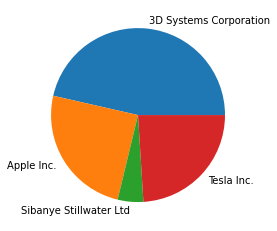

In [17]:
import matplotlib.pyplot as plt
import numpy as np

holding_ratios = instance.calculate_holdings_ratios(holdings=holdings)
labels: list = holding_ratios['name'].values
ratios: list = holding_ratios['ratio'].values

plt.pie(ratios, labels=labels)
plt.show() 